In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train=pd.read_csv('train_cab.csv')

In [3]:
train.head(50)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [4]:
print('The train data has',train.shape[0],'rows and',train.shape[1],'columns.')

The train data has 16067 rows and 7 columns.


In [5]:
test=pd.read_csv('test.csv')

In [6]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
print('The test data has',test.shape[0],'rows and',test.shape[1],'columns.')

The test data has 9914 rows and 6 columns.


# Exploratory Data Analysis

In [8]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [9]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [11]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [12]:
# Converting fare amount to float64 from object
train['fare_amount']=pd.to_numeric(train['fare_amount'],errors='coerce')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16042 non-null  float64
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(6), object(1)
memory usage: 878.8+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [15]:
# Converting object to datetime
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'],errors='coerce')

In [16]:
train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [17]:
# splitting the datetime in year,month,day,hour,minute,second
train['pickup_year']=train['pickup_datetime'].dt.year
train['pickup_month']=train['pickup_datetime'].dt.month
train['pickup_day']=train['pickup_datetime'].dt.day
train['pickup_hour']=train['pickup_datetime'].dt.hour
train['pickup_minute']=train['pickup_datetime'].dt.minute
train['pickup_second']=train['pickup_datetime'].dt.second

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        16042 non-null  float64            
 1   pickup_datetime    16066 non-null  datetime64[ns, UTC]
 2   pickup_longitude   16067 non-null  float64            
 3   pickup_latitude    16067 non-null  float64            
 4   dropoff_longitude  16067 non-null  float64            
 5   dropoff_latitude   16067 non-null  float64            
 6   passenger_count    16012 non-null  float64            
 7   pickup_year        16066 non-null  float64            
 8   pickup_month       16066 non-null  float64            
 9   pickup_day         16066 non-null  float64            
 10  pickup_hour        16066 non-null  float64            
 11  pickup_minute      16066 non-null  float64            
 12  pickup_second      16066 non-null  float64    

In [19]:
train=train.drop(['pickup_datetime'],axis=1)

In [20]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,17.0,26.0,21.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,16.0,52.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,0.0,35.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,4.0,30.0,42.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,7.0,51.0,0.0


In [21]:
train=train[train['pickup_longitude']!=0]
train=train[train['pickup_latitude']!=0]
train=train[train['dropoff_longitude']!=0]
train=train[train['dropoff_latitude']!=0]

In [22]:
from math import sin,cos,sqrt,atan2,radians,asin

def distance(lon1,lat1,lon2,lat2):
    #converting latitude and longitude into radians
    lon1,lat1,lon2,lat2=map(np.radians,[lon1,lat1,lon2,lat2])
    
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    a=np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    
    c=2*np.arcsin(np.sqrt(a))
    
    km=6367*c
    
    return km
train['Journey_Distance']=distance(train['pickup_longitude'],train['pickup_latitude'],train['dropoff_longitude'],train['dropoff_latitude'])

In [23]:
train['Journey_Distance'].describe()

count    15741.000000
mean         4.029316
std         55.998786
min          0.000000
25%          1.256354
50%          2.169302
75%          3.893920
max       5417.585418
Name: Journey_Distance, dtype: float64

C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


count    15718.000000
mean        15.082877
std        434.871661
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

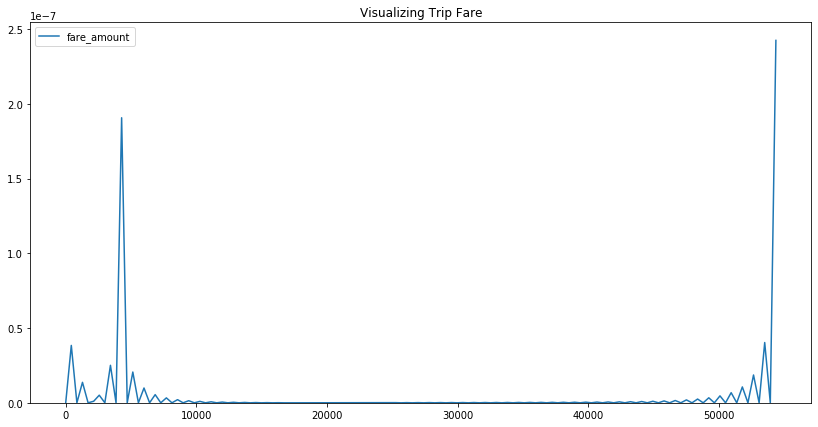

In [24]:
# Visualizing Trip Fare
plt.figure(figsize=(14,7))
sns.kdeplot(train['fare_amount']).set_title('Visualizing Trip Fare')
train['fare_amount'].describe()

In [25]:
# Since we see that we have negative fare amount value which is not possible so we drop those values
train=train.loc[train['fare_amount']>0]
train['fare_amount'].describe()

count    15714.000000
mean        15.087251
std        434.926922
min          0.010000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

Text(0.5, 1.0, 'Visualizing Passenger Count')

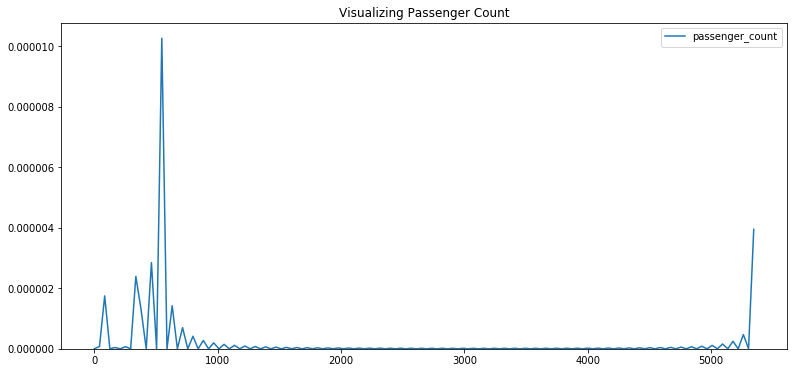

In [26]:
# Visualizing Passenger count
plt.figure(figsize=(13,6))
sns.kdeplot(train['passenger_count']).set_title('Visualizing Passenger Count')

In [27]:
train['passenger_count'].describe()

count    15659.000000
mean         2.626261
std         61.494649
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [28]:
train=train[train['passenger_count']<=6]
train=train[train['passenger_count']>=1]
train['passenger_count'].describe()

count    15586.000000
mean         1.650282
std          1.265780
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

Text(0.5, 1.0, 'Visualizing relation between Fare Amount and Passenger Count')

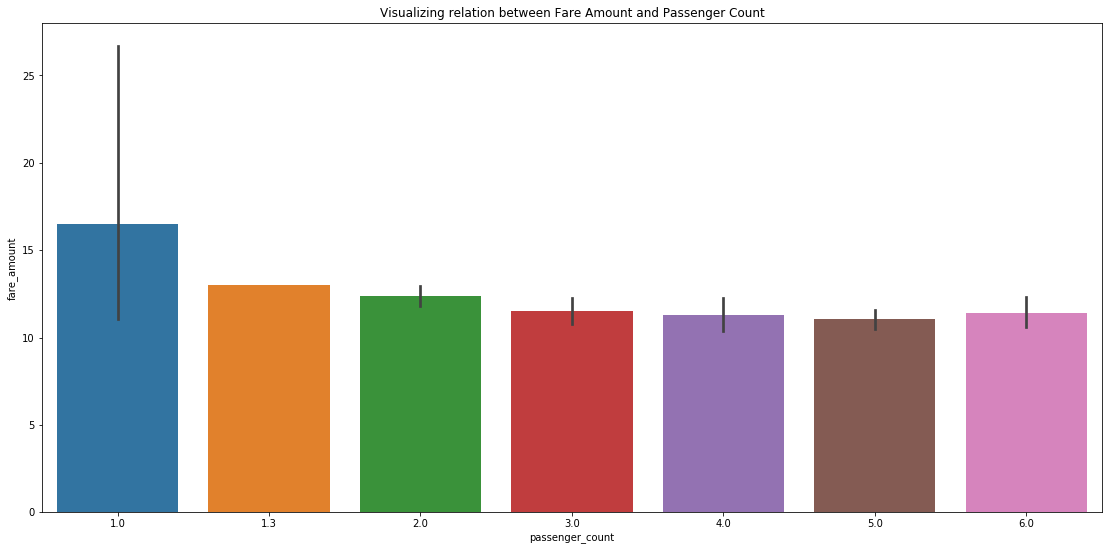

In [29]:
#Visualizing Fare AMount and passenger_count
plt.figure(figsize=(19,9))
sns.barplot(x='passenger_count',y='fare_amount',data=train).set_title('Visualizing relation between Fare Amount and Passenger Count')